## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*
###### 4. Try different Loss function and learning rate. 

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

In [2]:
from sklearn.datasets import load_boston  #导入波士顿房价数据集
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
import re
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414412237&di=8377c38d7b50c6f8d45b92ccc78dc1e7&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_jpg%2FlSyiavfm6wPgQDuDYa42IMgSkLOcPJU91RbkMibGy7VHLrhhNVLibTYk1iaLcmXKTdHc4icTDVia59QFXwqpW8cLflaw%2F640%3Fwx_fmt%3Djpeg)

In [41]:
dataset = load_boston()
X, y = dataset['data'], dataset['target']
X_rm=X[:,5]

In [42]:
def price(rm, k, b):   #随机定义一个线性函数
    """f(x) = k * x + b"""
    return k * rm + b  

In [43]:
def draw_rm_and_price():    #rm:房间数量和房价的关系  X[:,5]
    plt.scatter(X[:, 5], y)

In [44]:
def loss(y, y_hat): # to evaluate the performance 
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

## First-Method: Random generation: get best k and best b

In [45]:
def random_k_b(X_data,y_data,trying_times):

    min_loss = float('inf')   #正无穷
    best_k, best_b = None, None

    for i in range(trying_times):
        k = random.random() * 200 - 100  #定义k,b在±100的范围
        b = random.random() * 200 - 100
        price_by_random_k_and_b = [price(r, k, b) for r in X_data]    #如 X_data = X[:, 5]， 用房间数目预测房价

        current_loss = loss(y_data, price_by_random_k_and_b)

        if current_loss < min_loss:
            min_loss = current_loss
            best_k, best_b = k, b
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    return (best_k,best_b)

When time is : 0, get best_k: -63.95203036028647 best_b: -91.00892290768641, and the loss is: 268368.84208089724
When time is : 1, get best_k: -57.999439074730105 best_b: -10.22629190917597, and the loss is: 160080.99645478863
When time is : 2, get best_k: 55.81596081567682 best_b: 5.598397986769285, and the loss is: 112573.57200876407
When time is : 3, get best_k: 23.414576320163732 best_b: 49.97145007321811, and the loss is: 30626.43842141183
When time is : 21, get best_k: -3.462354197209592 best_b: 19.244375876380687, and the loss is: 748.7855888431459
When time is : 53, get best_k: 4.359794907807128 best_b: 17.294316958104858, and the loss is: 545.801052126521
When time is : 54, get best_k: -4.015067083646386 best_b: 46.73149082675724, and the loss is: 129.44412398345844
When time is : 123, get best_k: 7.601082061297731 best_b: -16.37326573610072, and the loss is: 123.2802376815935
When time is : 230, get best_k: 15.000806574717856 best_b: -75.17446663304588, and the loss is: 72.52

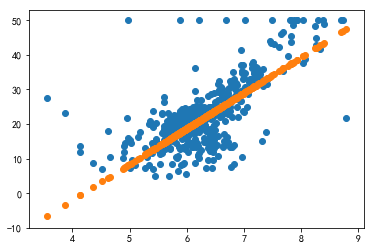

In [46]:
k1,b1=random_k_b(X[:,5],y,2000)
price_by_random_k_and_b = [price(r1, k1, b1) for r1 in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

## Second Method.Supervised Direction to get optimal *k* and *b*

In [55]:
def supervised_direction(X_data,y_data,trying_times): 
    min_loss = float('inf')

    best_k = random.random() * 200 - 100   #一开始初始的k和b
    best_b = random.random() * 200 - 100

    #定义k,b可以变化的方向
    direction = [
        (+1, -1),  # first element: k's change direction, second element: b's change direction
        (+1, +1), 
        (-1, -1), 
        (-1, +1),
    ]

    next_direction = random.choice(direction)
    scalar =0.1  #scalar=调节幅度
    update_time=0
    for i in range(trying_times):
        #scalar = random.random()   #实际运行时采用固定的scalar,结果经常还不如1st method,所以改为随机数
        k_direction, b_direction = next_direction

        current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar

        price_by_k_and_b = [price(r, current_k, current_b) for r in X_data]

        current_loss = loss(y_data, price_by_k_and_b)
        

        if current_loss < min_loss: # performance became better,update min_loss and k,b,continue using the current next_direction
            min_loss = current_loss
            best_k, best_b = current_k, current_b

            next_direction = next_direction
            update_time+=0
            if update_time %100 ==0:
                print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
        else:
            next_direction = random.choice(direction)
    return best_k,best_b

When time is : 0, get best_k: -88.85959123877932 best_b: 29.72048692797457, and the loss is: 308661.9395007022
When time is : 8, get best_k: -88.75959123877932 best_b: 29.620486927974568, and the loss is: 308069.92664196267
When time is : 9, get best_k: -88.65959123877933 best_b: 29.520486927974567, and the loss is: 307478.4821843399
When time is : 10, get best_k: -88.55959123877933 best_b: 29.420486927974565, and the loss is: 306887.6061278339
When time is : 11, get best_k: -88.45959123877934 best_b: 29.320486927974564, and the loss is: 306297.2984724439
When time is : 12, get best_k: -88.35959123877934 best_b: 29.220486927974562, and the loss is: 305707.55921817105
When time is : 13, get best_k: -88.25959123877935 best_b: 29.12048692797456, and the loss is: 305118.38836501393
When time is : 14, get best_k: -88.15959123877936 best_b: 29.02048692797456, and the loss is: 304529.78591297363
When time is : 15, get best_k: -88.05959123877936 best_b: 28.920486927974558, and the loss is: 303

When time is : 204, get best_k: -69.15959123878044 best_b: 10.020486927974396, and the loss is: 203008.95828388102
When time is : 205, get best_k: -69.05959123878044 best_b: 9.920486927974396, and the loss is: 202528.92044508873
When time is : 206, get best_k: -68.95959123878045 best_b: 9.820486927974397, and the loss is: 202049.45100741304
When time is : 207, get best_k: -68.85959123878045 best_b: 9.720486927974397, and the loss is: 201570.54997085364
When time is : 208, get best_k: -68.75959123878046 best_b: 9.620486927974397, and the loss is: 201092.21733541106
When time is : 209, get best_k: -68.65959123878046 best_b: 9.520486927974398, and the loss is: 200614.45310108468
When time is : 210, get best_k: -68.55959123878047 best_b: 9.420486927974398, and the loss is: 200137.25726787484
When time is : 211, get best_k: -68.45959123878048 best_b: 9.320486927974398, and the loss is: 199660.62983578164
When time is : 212, get best_k: -68.35959123878048 best_b: 9.220486927974399, and the l

When time is : 436, get best_k: -45.95959123878047 best_b: -13.179513072025555, and the loss is: 106871.05600133286
When time is : 437, get best_k: -45.85959123878047 best_b: -13.279513072025555, and the loss is: 106522.88722156429
When time is : 438, get best_k: -45.759591238780466 best_b: -13.379513072025555, and the loss is: 106175.28684291245
When time is : 439, get best_k: -45.659591238780465 best_b: -13.479513072025554, and the loss is: 105828.25486537705
When time is : 440, get best_k: -45.55959123878046 best_b: -13.579513072025554, and the loss is: 105481.79128895815
When time is : 441, get best_k: -45.45959123878046 best_b: -13.679513072025554, and the loss is: 105135.8961136556
When time is : 442, get best_k: -45.35959123878046 best_b: -13.779513072025553, and the loss is: 104790.56933946973
When time is : 443, get best_k: -45.25959123878046 best_b: -13.879513072025553, and the loss is: 104445.81096640005
When time is : 444, get best_k: -45.15959123878046 best_b: -13.97951307

When time is : 585, get best_k: -31.059591238780257 best_b: -28.079513072025716, and the loss is: 61261.09852617459
When time is : 586, get best_k: -30.959591238780256 best_b: -28.179513072025717, and the loss is: 60997.621512761936
When time is : 587, get best_k: -30.859591238780254 best_b: -28.27951307202572, and the loss is: 60734.712900465915
When time is : 588, get best_k: -30.759591238780253 best_b: -28.37951307202572, and the loss is: 60472.37268928633
When time is : 589, get best_k: -30.65959123878025 best_b: -28.47951307202572, and the loss is: 60210.60087922327
When time is : 590, get best_k: -30.55959123878025 best_b: -28.579513072025723, and the loss is: 59949.3974702766
When time is : 591, get best_k: -30.45959123878025 best_b: -28.679513072025724, and the loss is: 59688.762462446466
When time is : 592, get best_k: -30.359591238780247 best_b: -28.779513072025726, and the loss is: 59428.69585573287
When time is : 593, get best_k: -30.259591238780246 best_b: -28.879513072025

When time is : 733, get best_k: -16.259591238780047 best_b: -42.87951307202592, and the loss is: 28449.567886211436
When time is : 734, get best_k: -16.159591238780045 best_b: -42.979513072025924, and the loss is: 28270.214238038276
When time is : 735, get best_k: -16.059591238780044 best_b: -43.079513072025925, and the loss is: 28091.428990981574
When time is : 736, get best_k: -15.959591238780044 best_b: -43.17951307202593, and the loss is: 27913.212145041394
When time is : 737, get best_k: -15.859591238780045 best_b: -43.27951307202593, and the loss is: 27735.563700217674
When time is : 738, get best_k: -15.759591238780045 best_b: -43.37951307202593, and the loss is: 27558.483656510434
When time is : 739, get best_k: -15.659591238780045 best_b: -43.47951307202593, and the loss is: 27381.972013919665
When time is : 740, get best_k: -15.559591238780046 best_b: -43.57951307202593, and the loss is: 27206.02877244538
When time is : 741, get best_k: -15.459591238780046 best_b: -43.6795130

When time is : 885, get best_k: -1.0595912387800839 best_b: -58.07951307202614, and the loss is: 7710.784576639131
When time is : 886, get best_k: -0.9595912387800839 best_b: -58.17951307202614, and the loss is: 7617.827898171262
When time is : 887, get best_k: -0.8595912387800839 best_b: -58.27951307202614, and the loss is: 7525.43962081986
When time is : 888, get best_k: -0.7595912387800839 best_b: -58.37951307202614, and the loss is: 7433.6197445849475
When time is : 889, get best_k: -0.659591238780084 best_b: -58.479513072026144, and the loss is: 7342.368269466507
When time is : 890, get best_k: -0.559591238780084 best_b: -58.579513072026145, and the loss is: 7251.685195464553
When time is : 891, get best_k: -0.459591238780084 best_b: -58.67951307202615, and the loss is: 7161.570522579098
When time is : 892, get best_k: -0.35959123878008403 best_b: -58.77951307202615, and the loss is: 7072.0242508101155
When time is : 893, get best_k: -0.25959123878008405 best_b: -58.87951307202615

When time is : 1029, get best_k: 13.340408761219885 best_b: -72.47951307202574, and the loss is: 177.28077256568608
When time is : 1030, get best_k: 13.440408761219885 best_b: -72.57951307202573, and the loss is: 166.17385487124787
When time is : 1031, get best_k: 13.540408761219885 best_b: -72.67951307202573, and the loss is: 155.63533829329182
When time is : 1032, get best_k: 13.640408761219884 best_b: -72.77951307202572, and the loss is: 145.6652228318178
When time is : 1033, get best_k: 13.740408761219884 best_b: -72.87951307202572, and the loss is: 136.26350848682642
When time is : 1034, get best_k: 13.840408761219884 best_b: -72.97951307202571, and the loss is: 127.43019525831699
When time is : 1035, get best_k: 13.940408761219883 best_b: -73.0795130720257, and the loss is: 119.16528314629
When time is : 1036, get best_k: 14.040408761219883 best_b: -73.1795130720257, and the loss is: 111.46877215074505
When time is : 1037, get best_k: 14.140408761219883 best_b: -73.2795130720257,

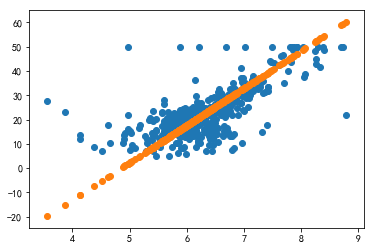

In [57]:
k2,b2=supervised_direction(X[:,5],y,10000)
price_by_supervisedDirection_k_and_b = [price(r2, k2, b2) for r2 in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_supervisedDirection_k_and_b)

## 3.Gradient Descent to get optimal *k* and *b*

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - (kx_i + b_i))x_i== -\frac{2}{n}\sum(y_i - \hat{y_i})$$
$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - \hat{y_i})$$

In [49]:
def partial_k(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    
    return -2 / n * gradient


def partial_b(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
    
    return -2 / n * gradient

In [52]:
def gradient_descent(X_data,y_data,trying_times):    
    min_loss = float('inf') 

    current_k = random.random() * 200 - 100
    current_b = random.random() * 200 - 100

    learning_rate = 1e-05

    update_time = 0

    for i in range(trying_times):

        price_by_k_and_b = [price(r, current_k, current_b) for r in X_data]

        current_loss = loss(y_data, price_by_k_and_b)

        if current_loss < min_loss: # performance became better
            min_loss = current_loss
            best_k,best_b=current_k,current_b

            if i % 100 == 0: 
                print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

        k_gradient = partial_k(X_data, y_data, price_by_k_and_b)

        b_gradient = partial_b(X_data, y_data, price_by_k_and_b)

        current_k = current_k + (-1 * k_gradient) * learning_rate

        current_b = current_b + (-1 * b_gradient) * learning_rate
    return (best_k,best_b)

When time is : 0, get best_k: -60.26312901345825 best_b: -93.73225743399014, and the loss is: 247436.05012976946
When time is : 100, get best_k: -17.217590573680212 best_b: -86.9537015026689, and the loss is: 47775.04556810318
When time is : 200, get best_k: 1.684700682424022 best_b: -83.97058921144324, and the loss is: 9270.522939764804
When time is : 300, get best_k: 9.984575525459991 best_b: -82.65423331472849, and the loss is: 1844.9369270570796
When time is : 400, get best_k: 13.628439116158788 best_b: -82.06982877417461, and the loss is: 412.90630989181665
When time is : 500, get best_k: 15.227633028324858 best_b: -81.80685945502555, and the loss is: 136.7294740473351
When time is : 600, get best_k: 15.928918141946589 best_b: -81.68504873255921, and the loss is: 83.45839282388783
When time is : 700, get best_k: 16.235890206036462 best_b: -81.62522880128928, and the loss is: 73.17456567284275
When time is : 800, get best_k: 16.369701409173732 best_b: -81.59263341533004, and the lo

When time is : 7200, get best_k: 16.363248546365003 best_b: -80.85958643533343, and the loss is: 69.88590995210356
When time is : 7300, get best_k: 16.36150265152661 best_b: -80.84848059223383, and the loss is: 69.87327117726517
When time is : 7400, get best_k: 16.35975717647751 best_b: -80.8373774194636, and the loss is: 69.86063847952207
When time is : 7500, get best_k: 16.3580121211168 best_b: -80.8262769163806, and the loss is: 69.8480118559523
When time is : 7600, get best_k: 16.356267485343547 best_b: -80.8151790823431, and the loss is: 69.83539130363543
When time is : 7700, get best_k: 16.354523269056884 best_b: -80.8040839167092, and the loss is: 69.82277681965196
When time is : 7800, get best_k: 16.35277947215593 best_b: -80.79299141883735, and the loss is: 69.81016840108408
When time is : 7900, get best_k: 16.351036094539865 best_b: -80.78190158808607, and the loss is: 69.79756604501547
When time is : 8000, get best_k: 16.349293136107843 best_b: -80.77081442381404, and the lo

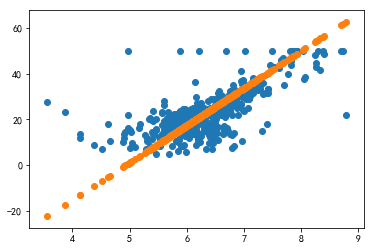

In [58]:
k3,b3=gradient_descent(X[:,5],y,10000)
price_by_gradient_descent_k_and_b = [price(r3, k3, b3) for r3 in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_gradient_descent_k_and_b)

## 4. Try different Loss function and learning rate. 
$Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

when $$ \hat{y_i}<y_i$$               
$$\frac{\partial{loss}}{\partial{k}} = -\frac{1}{n}\sum(x_i)$$   
$$\frac{\partial{loss}}{\partial{b}} = -\frac{1}{n}\sum(1)$$
when $$\hat{y_i}>y_i$$               
$$\frac{\partial{loss}}{\partial{k}} = \frac{1}{n}\sum(x_i)$$   
$$\frac{\partial{loss}}{\partial{b}} = \frac{1}{n}\sum(1)$$

In [59]:
def loss2(y, y_hat): # to evaluate the performance 
    return np.abs(y-y_hat).sum()/len(y)

In [60]:
def partial2_k(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        if y_hat_i<y_i:
            gradient -= x_i
        else:
            gradient += x_i
    
    return 1 / n * gradient

def partial2_b(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        if y_hat_i<y_i:
            gradient -= 1
        else:
            gradient += 1
    
    return 1 / n * gradient

In [61]:
def gradient_descent2(X_data,y_data,trying_times):     
    min_loss = float('inf') 

    current_k = random.random() * 200 - 100
    current_b = random.random() * 200 - 100

    learning_rate = 1e-03


    update_time = 0

    for i in range(trying_times):

        price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]

        current_loss = loss2(y, price_by_k_and_b)

        if current_loss < min_loss: # performance became better
            min_loss = current_loss
            best_k,best_b=current_k,current_b

            if i % 200 == 0: 
                print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

        k_gradient = partial2_k(X_rm, y, price_by_k_and_b)

        b_gradient = partial2_b(X_rm, y, price_by_k_and_b)

        current_k = current_k + (-1 * k_gradient) * learning_rate

        current_b = current_b + (-1 * b_gradient) * learning_rate
    return (best_k,best_b)

When time is : 0, get best_k: 42.03782672731532 best_b: -99.19333443545449, and the loss is: 142.46623066045638
When time is : 200, get best_k: 40.780899849845554 best_b: -99.39333443545544, and the loss is: 134.36690478392222
When time is : 400, get best_k: 39.52397297237579 best_b: -99.5933344354564, and the loss is: 126.2675789073881
When time is : 600, get best_k: 38.26704609490602 best_b: -99.79333443545735, and the loss is: 118.16825303085395
When time is : 800, get best_k: 37.010119217436255 best_b: -99.99333443545831, and the loss is: 110.06892715431981
When time is : 1000, get best_k: 35.75341754154746 best_b: -100.19327119435249, and the loss is: 101.97256343058284
When time is : 1200, get best_k: 34.49930568383988 best_b: -100.39248068051879, and the loss is: 93.91015857547654
When time is : 1400, get best_k: 33.245193826132294 best_b: -100.59169016668508, and the loss is: 85.84775372037026
When time is : 1600, get best_k: 31.991265193721148 best_b: -100.7908522220213, and t

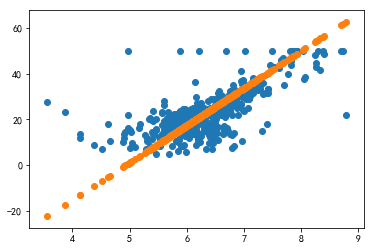

In [62]:
k4,b4=gradient_descent2(X[:,5],y,10000)
price_by_gradient_descent2_k_and_b = [price(r4, k4, b4) for r4 in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_gradient_descent_k_and_b)

## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans:因为可能情况不停的在变化，再复杂的公式都不可能handle新的情况，比如垃圾邮件的例子。所以我们让机器基于数据去学习，可以不断修正函数

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans:没有方向性，想要实现大的精度，非常耗时间。如果参数不止一个k,一个b，那变化的空间就更大了，实现一定的精度更慢

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans:第二种方法增加了方向的选择，loss下降速度更快，一定程度上优于第一种方法。但是如果参数不止一个k,对很多的k1,k2,k3,k4...b做random.choice，可以组合的choice也非常大，减小了往正确方向移动的可能性(而且实际运行中第二种方法的结果非常不稳定，经常跑出不如方法一的loss,怎么样更有针对性的调scalar呢？)

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans:因为求导以后，负的斜率说明变化的方向是正确的，可以进一步向着这个方向优化。优于2nd method supervised direction

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans:梯度是损失函数对参数的偏导数，下降代表了是按照梯度的负方向

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:变化的方向更明确，每一次都朝着更小的方向更新

###### 7. Using the simple words to describe: What's the machine leanring.

Ans:通过大量的数据+一定的规则引导，让机器自己学习输入与输出的关系

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('奥体中心', '天安门') 
```
you need get the result: 

奥体中心-> A -> B -> C -> ... -> 天安门



In [21]:
import requests
import networkx as nx
from collections import defaultdict
from bs4 import BeautifulSoup

In [22]:
url = 'http://www.bjsubway.com/station/zjgls/'  #北京地铁官网

In [23]:
response = requests.get(url)
response.encoding='GBK'

In [24]:
soup=BeautifulSoup(response.text,'lxml')

In [25]:
lines=soup.find_all('div',class_='line_place')      #每个line是一条地铁线路的站点信息

In [26]:
path_lst=[]                      #路径列表 
dis_dic={}                       #站间距离的字典
for line in lines:
    tbodys=line.find_all('tbody')
    for tbody in tbodys:   #14号线有东西两段
        trs=tbody.find_all('tr')
        for tr in trs:
            sub_route=tr.find('th').text
            path_lst.append(sub_route)
            dis_dic[sub_route]=tr.find('td').text
            dis_dic[sub_route.split('——')[1]+'——'+sub_route.split('——')[0]]=tr.find('td').text
            
        print(path_lst[-1])  #打印每条线路最后一个站点查看信息的完整性

四惠——四惠东
积水潭——西直门
角门西——公益西桥
刘家窑——宋家庄
东夏园——潞城
双合——焦化厂
什刹海——南锣鼓巷
丰台科技园——郭公庄
火器营——巴沟
柳芳——东直门
七里庄——西局
来广营——善各庄
顺义——俸伯
临河里——土桥
生命科学园——西二旗
次渠南——次渠
生物医药基地——天宫院
良乡南关——苏庄
T2航站楼——三元桥


In [27]:
station_connection=defaultdict(list)    #得到站点关系的字典    
for path in path_lst:
    station_connection[path.split('——')[0]].append(path.split('——')[1])
    station_connection[path.split('——')[1]].append(path.split('——')[0])
station_connection

defaultdict(list,
            {'苹果园': ['古城'],
             '古城': ['苹果园', '八角游乐园'],
             '八角游乐园': ['古城', '八宝山'],
             '八宝山': ['八角游乐园', '玉泉路'],
             '玉泉路': ['八宝山', '五棵松'],
             '五棵松': ['玉泉路', '万寿路'],
             '万寿路': ['五棵松', '公主坟'],
             '公主坟': ['万寿路', '军事博物馆', '莲花桥', '西钓鱼台'],
             '军事博物馆': ['公主坟', '木樨地', '白堆子', '北京西站'],
             '木樨地': ['军事博物馆', '南礼士路'],
             '南礼士路': ['木樨地', '复兴门'],
             '复兴门': ['南礼士路', '西单', '阜成门', '长椿街'],
             '西单': ['复兴门', '天安门西', '灵境胡同', '宣武门'],
             '天安门西': ['西单', '天安门东'],
             '天安门东': ['天安门西', '王府井'],
             '王府井': ['天安门东', '东单'],
             '东单': ['王府井', '建国门', '灯市口', '崇文门'],
             '建国门': ['东单', '永安里', '北京站', '朝阳门'],
             '永安里': ['建国门', '国贸'],
             '国贸': ['永安里', '大望路', '金台夕照', '双井'],
             '大望路': ['国贸', '四惠', '九龙山', '红庙'],
             '四惠': ['大望路', '四惠东', '四惠东'],
             '四惠东': ['四惠', '四惠', '高碑店'],
             '西直门': ['车公庄', 

In [28]:
station_line = defaultdict(list)  #每条线路包含的站点列表组成的字典  
for line in lines:
    line_name=line.find('td').text
    line_name=re.match(r'([\w\d]+线)',line_name).group(1)
    trs=line.find('tbody').find_all('tr')
    #print(line_name)

    for tr in trs:
        station_line[line_name].append(tr.find("th").text.split('——')[0])  #每条线路添加所有的站点
    station_line[line_name].append(trs[-1].find("th").text.split('——')[1])
    
print(station_line.keys())

dict_keys(['1号线', '2号线', '4号线', '5号线', '6号线', '7号线', '8号线', '9号线', '10号线', '13号线', '14号线', '15号线', '八通线', '昌平线', '亦庄线', '大兴线', '房山线', '机场线'])


In [29]:
##14号线有东西两段,需要作一些修改
station_line['14号线西段']=station_line.pop('14号线')
print(station_line.keys())

dict_keys(['1号线', '2号线', '4号线', '5号线', '6号线', '7号线', '8号线', '9号线', '10号线', '13号线', '15号线', '八通线', '昌平线', '亦庄线', '大兴线', '房山线', '机场线', '14号线西段'])


In [30]:
station_line['14号线东段']=[]
line14_tbodys=lines[10].find_all('tbody')     #添加14号线东段的信息
line14_east=line14_tbodys[1].find_all('tr')
line14_lst=[]
for tr in line14_east:
    line14_lst.append(tr.find("th").text)

print(line14_lst)

for line14_east_station in line14_lst:
    station_line['14号线东段'].append(line14_east_station.split('——')[0])
station_line['14号线东段'].append(line14_east_station.split('——')[1])

len(station_line['14号线东段'])

['北京南站——陶然桥', '陶然桥——永定门外', '永定门外——景泰', '景泰——蒲黄榆', '蒲黄榆——方庄', '方庄——十里河', '十里河——南八里庄', '南八里庄——北工大西门', '北工大西门——平乐园', '平乐园——九龙山', '九龙山——大望路', '大望路——红庙', '红庙——金台路', '金台路——朝阳公园', '朝阳公园——枣营', '枣营——东风北桥', '东风北桥——将台', '将台——高家园', '高家园——望京南', '望京南——阜通', '阜通——望京', '望京——东湖渠', '东湖渠——来广营', '来广营——善各庄']


25

C:\Users\yuan-he\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


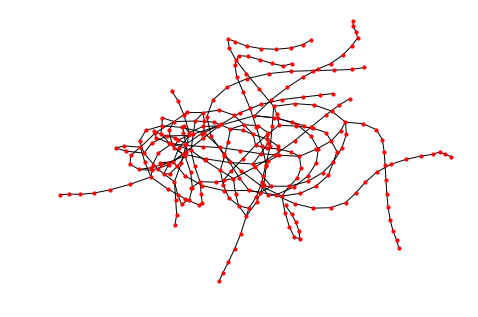

In [31]:
stations=station_connection.keys()               #可视化站点连接信息
station_graph = nx.Graph()
station_graph.add_nodes_from(stations)
nx.draw(nx.Graph(station_connection), node_size=10)

## Build the search agent

In [32]:
#Build the search agent
def search(start,destination,connection_graph):
    pathes=[[start]] #把所有的地铁站点放进一个嵌套列表
    visited=set()
    
    n=0
    while pathes: #只要还有路就继续扩展
        path = pathes.pop(0)   #把最早见过地铁站拿出来(最早扩展的站节点最少),path是一个列表，代表一个路径
        frontier = path[-1]   #frontier是这条路径最后一个站点
        
        if frontier in visited:continue    #如果遇到过这个站点，就跳过
        successors=connection_graph[frontier]  #如果没有，就把他的关联地铁站点加进来
        
        
        #print('第%i次while循环：path,fontier,successors'%n,path,frontier,successors)
        for station in successors:
            if station in path:continue #eliminate 重复路径
            new_path = path + [station]   #new_path 是一个列表
            pathes.append(new_path)    #pathes是一个路径列表嵌套列表 e.g.[['兰州', '西安', '郑州'], ['兰州', '西安', '长沙']]
            
            
            if station == destination:return new_path
        visited.add(frontier)
        #print('第%i次循环after for loop,new_path,pathes，visited'%n,new_path,pathes,visited)
        #print('-----')
        
        n=n+1

In [33]:
def pretty_print(cities):
    print('🚗->'.join(cities))

In [34]:
pretty_print(search('宣武门','桥湾',station_connection))

宣武门🚗->菜市口🚗->虎坊桥🚗->珠市口🚗->桥湾


## （Optional）Create different policies for transfer system.

以下部门为可选部分，请酌情完成。 并不要求全部同学完成。

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

## Define different policies for transfer system

In [35]:
#Define different policies for transfer system
station_line_info=defaultdict(list)   #站点所在线路的字典
for line, stations in station_line.items():
    for station in stations:
        station_line_info[station].append(line)
station_line_info

defaultdict(list,
            {'苹果园': ['1号线'],
             '古城': ['1号线'],
             '八角游乐园': ['1号线'],
             '八宝山': ['1号线'],
             '玉泉路': ['1号线'],
             '五棵松': ['1号线'],
             '万寿路': ['1号线'],
             '公主坟': ['1号线', '10号线'],
             '军事博物馆': ['1号线', '9号线'],
             '木樨地': ['1号线'],
             '南礼士路': ['1号线'],
             '复兴门': ['1号线', '2号线'],
             '西单': ['1号线', '4号线'],
             '天安门西': ['1号线'],
             '天安门东': ['1号线'],
             '王府井': ['1号线'],
             '东单': ['1号线', '5号线'],
             '建国门': ['1号线', '2号线'],
             '永安里': ['1号线'],
             '国贸': ['1号线', '10号线'],
             '大望路': ['1号线', '14号线东段'],
             '四惠': ['1号线', '八通线'],
             '四惠东': ['1号线', '八通线'],
             '西直门': ['2号线', '2号线', '4号线', '13号线'],
             '车公庄': ['2号线', '6号线'],
             '阜成门': ['2号线'],
             '长椿街': ['2号线'],
             '宣武门': ['2号线', '4号线'],
             '和平门': ['2号线'],
             '前门': ['2号线'],


In [36]:
def get_transfer_counts(path):     #计算转线次数
    count=0
    pre_line=station_line_info[path[0]]     #initialize previous station
    #print(pre_line)
    
    for i in range(1,len(path)): #compare line with previous line
        if all (line not in pre_line for line in station_line_info[path[i]]): 
            count+=1  #遍历当前车站所在线路，若所有可能线路都不存在pre-sta中，则必须换线
            pre_line=station_line_info[path[i]] #更新前一站的线路列表为当前车站所在线路
        else:
             pre_line=list(set(station_line_info[path[i]]) & set(pre_line))  #仅更新列表为当前站和上一次的交集   
        #print(pre_line)
    #print(count)
    return count

In [146]:
get_transfer_counts(['建国门','永安里','国贸','大望路','四惠','四惠东'])

0

In [37]:
def get_path_distance(path):  #计算距离
    distance = 0
    for i in range(1,len(path)):
        distance += int(dis_dic[path[i-1]+'——'+path[i]])
    #print(distance)        
    return distance

get_path_distance(['复兴门','西单','宣武门','菜市口'])

3557

In [38]:
def Comprehensive_order(path):   #综合考量，时速按35KM/H，每次换乘+8分钟考虑，(综合优先)
    time_for_travel=get_path_distance(path)/35/1000*60  #time in minutes
    time_for_interchange=get_transfer_counts(path)*8    #time in minutes
    #print(str(time_for_travel+time_for_interchange) + 'mins')
    return time_for_travel+time_for_interchange

In [39]:
def search_with_strategy(start, destination, connection_grpah, strategy):   #们可以加一个排序函数 对我们的搜索策略进行控制
    pathes = [[start]]
    complete_pathes=[]
    visited = set()
    
    while pathes: # if we find existing pathes
        path = pathes.pop(0)
        froninter = path[-1]
        
        if froninter in visited: continue
            
        successors = connection_grpah[froninter]
        #print('1',successors)
        for city in successors:
            if city in path: continue  # eliminate loop
                
            new_path = path + [city]
            
            pathes.append(new_path)
            
            if city == destination: 
                complete_pathes.append(new_path)
                #print(new_path)
        #print('2',pathes)
        visited.add(froninter)
        #print('3',visited)
        #print('4',complete_pathes)
    complete_pathes.sort(key=strategy)
    print(complete_pathes)
    return complete_pathes[0]

In [40]:
# Minimum Transfer Priority(最少换乘优先)
#print(len((search_with_strategy('西局','劲松',station_connection,get_transfer_counts))))
pretty_print(search_with_strategy('六里桥','十里河',station_connection,get_transfer_counts))

[['六里桥', '西局', '泥洼', '丰台站', '首经贸', '纪家庙', '草桥', '角门西', '角门东', '大红门', '石榴庄', '宋家庄', '成寿寺', '分钟寺', '十里河'], ['六里桥', '六里桥东', '北京西站', '湾子', '达官营', '广安门内', '菜市口', '陶然亭', '北京南站', '陶然桥', '永定门外', '景泰', '蒲黄榆', '方庄', '十里河']]
六里桥🚗->西局🚗->泥洼🚗->丰台站🚗->首经贸🚗->纪家庙🚗->草桥🚗->角门西🚗->角门东🚗->大红门🚗->石榴庄🚗->宋家庄🚗->成寿寺🚗->分钟寺🚗->十里河


In [41]:
#Shortest Path Priority（路程最短优先）
#print(len(search_with_strategy('西局','劲松',station_connection, get_path_distance)))
pretty_print(search_with_strategy('六里桥','十里河',station_connection, get_path_distance))

[['六里桥', '六里桥东', '北京西站', '湾子', '达官营', '广安门内', '菜市口', '陶然亭', '北京南站', '陶然桥', '永定门外', '景泰', '蒲黄榆', '方庄', '十里河'], ['六里桥', '西局', '泥洼', '丰台站', '首经贸', '纪家庙', '草桥', '角门西', '角门东', '大红门', '石榴庄', '宋家庄', '成寿寺', '分钟寺', '十里河']]
六里桥🚗->六里桥东🚗->北京西站🚗->湾子🚗->达官营🚗->广安门内🚗->菜市口🚗->陶然亭🚗->北京南站🚗->陶然桥🚗->永定门外🚗->景泰🚗->蒲黄榆🚗->方庄🚗->十里河


In [42]:
#Comprehensive Priority(综合优先)
pretty_print(search_with_strategy('六里桥','十里河',station_connection, Comprehensive_order))

[['六里桥', '西局', '泥洼', '丰台站', '首经贸', '纪家庙', '草桥', '角门西', '角门东', '大红门', '石榴庄', '宋家庄', '成寿寺', '分钟寺', '十里河'], ['六里桥', '六里桥东', '北京西站', '湾子', '达官营', '广安门内', '菜市口', '陶然亭', '北京南站', '陶然桥', '永定门外', '景泰', '蒲黄榆', '方庄', '十里河']]
六里桥🚗->西局🚗->泥洼🚗->丰台站🚗->首经贸🚗->纪家庙🚗->草桥🚗->角门西🚗->角门东🚗->大红门🚗->石榴庄🚗->宋家庄🚗->成寿寺🚗->分钟寺🚗->十里河


## Implement Continuous transfer.

In [43]:
def search_with_byway(start, destination, connection_graph, by_way):   
    sub_route=[]
    while by_way:
        begin=search(start,by_way[0],connection_graph)
        #print(begin)
        if len(by_way)>1:end=search(by_way[0],by_way[1],connection_graph)
        else:end=search(by_way[0],destination,connection_graph)
        #print(end)
        #print(begin+end[1:])
        sub_route.extend(begin+end[1:])
        by_way.pop(0)
    return sub_route

In [156]:
pretty_print(search_with_byway('六里桥','十里河',station_connection, ['北京南站','磁器口']))

六里桥🚗->六里桥东🚗->北京西站🚗->湾子🚗->达官营🚗->广安门内🚗->菜市口🚗->陶然亭🚗->北京南站🚗->陶然亭🚗->菜市口🚗->虎坊桥🚗->珠市口🚗->桥湾🚗->磁器口🚗->六里桥🚗->六里桥东🚗->北京西站🚗->湾子🚗->达官营🚗->广安门内🚗->菜市口🚗->虎坊桥🚗->珠市口🚗->桥湾🚗->磁器口🚗->天坛东门🚗->蒲黄榆🚗->方庄🚗->十里河


In [44]:
len(search_with_byway('六里桥','十里河',station_connection, ['北京南站','磁器口']))

30

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因


恭喜，完成本次课程，你对常用的人工智能方法以及有一定的了解了。基于规则的，基于概率模型的，基于搜索的，基于机器学习的。 可以说，我们现在通常见到的方法都能够归属到这几类方法中。 这就是**人工智能**，并没有很难是吧？ 继续加油！

## 和高德地图进行分析比较
    1. 高德地图坐公交没有 *by_way*的选项，无法直观比较。自己在做by_way的时候，确实是智商不够了，时间也不够了，简化的比较厉害，直接用的BFS的模型，然后将路径进行叠加，应该不是最优的解法。但是考虑实际情况中需要导航时，一般会增加合理的中途点，应该还是可以得到合理的结果。
    2. 由于北京地铁官网没有8号线南段的信息，已经部分站点临时关闭（如双井），结果和高德地图不完全一样。

## 一些其他问题
1. 另外由于爬虫技巧不熟，不会爬动态网址（暂时也确实没时间学），所以没去同学推荐的'http://map.amap.com/subway/index.html?1100' 爬每个站点的坐标，偷懒直接用的官网的距离相加算距离。由于正则也不熟，所以本篇代码正则也用的有点少,以后有机会一定多练习，如果老师能简单讲一下正则就更好了。
2. 路线规划的部分，有一点疑惑，理论上从A点到B点(比如从车公庄西到车公庄，只有一站)，最优解肯定是车公庄西-车公庄，但是如果我非要绕路的话，['车公庄西','白石桥南','国家图书馆','动物园','西直门','车公庄']也应该在我的complete_pathes的列表中备选，但是实际运行，好像只生成了['车公庄西', '车公庄']这一条路，为什么呢？

In [46]:
pretty_print(search_with_strategy('车公庄西','车公庄',station_connection,get_transfer_counts))

[['车公庄西', '车公庄']]
车公庄西🚗->车公庄


![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)